In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/food-delivery-time-prediction")

print("Path to dataset files:", path)

/home/y/Desktop/Work/data_analytics/linear_regression/src/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/y/.cache/kagglehub/datasets/denkuznetz/food-delivery-time-prediction/versions/1


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(f"{path}/Food_Delivery_Times.csv")

In [5]:
df.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [6]:
# fix column names
df.columns = [x.lower() for x in df.columns]

In [7]:
df.columns

Index(['order_id', 'distance_km', 'weather', 'traffic_level', 'time_of_day',
       'vehicle_type', 'preparation_time_min', 'courier_experience_yrs',
       'delivery_time_min'],
      dtype='object')

In [8]:
df = df[["distance_km", "delivery_time_min"]]
df.head(2)

,distance_km,delivery_time_min
0,7.93,43
1,16.42,84


In [9]:
def calc_wb(x,y,w,b):
    new_w = -2*x*(y-(w*x+b))
    new_b = -2*(y-(w*x+b))

    return new_w, new_b

We need to run calc_wb on every row.

In [10]:
x_vector = df["distance_km"].to_numpy()
y_vector = df["delivery_time_min"].to_numpy()
df.head(2)

,distance_km,delivery_time_min
0,7.93,43
1,16.42,84


In [13]:
df.shape

(1000, 2)

In [29]:
# need to call calc_wb n times
def get_gradients(w, b, xv=x_vector, yv=y_vector):
    tmp_w, tmp_b = 0,0
    for i in range(len(xv)):
        tmp_w += -2*xv[i]*(yv[i]-(w*xv[i]+b))
        tmp_b += -2*(yv[i]-(w*xv[i]+b))

    return tmp_w/len(xv), tmp_b/len(xv)

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def train():
    w = 0
    b = 0
    rate = 0.001
    epoch = 100
    weights = []
    biases = []
    
    for _ in range(epoch):
        tmp_w, tmp_b = get_gradients(w,b, x_vector, y_vector)
        w -= 1*rate*tmp_w
        b -= 1*rate*tmp_b
        weights.append(w)
        biases.append(b)
        

    line_eq = w*x_vector + b
    fig, ax = plt.subplots()
    ax.plot(x_vector, y_vector, 'o')
    #line_plot, = ax.plot(x_vector, weights[0] * x_vector + biases[0], '-', label="Fitting line")  # Line plot
    line_plot, = ax.plot(x_vector, weights[-1] * x_vector + biases[-1], '-', label="Best-fit line")  # Line plot

    ax.set_title("[Food] Delivery Time Prediction")
    ax.set_ylabel("Delivery Time Taken (Minutes)")
    ax.set_xlabel("Distance (Km)")
    plt.legend()

    # Animation update function
    #def update(frame):
        #line_plot.set_ydata(weights[frame] * x_vector + biases[frame])  # Update line
        #return line_plot,

    # Create the animation
    #ani = FuncAnimation(fig, update, frames=range(epoch), interval=10, blit=True)
    #ani.save('linear_regression_A.gif', writer='ffmpeg') 

    # Display the animation
    plt.show()

In [106]:
def main():
    train()

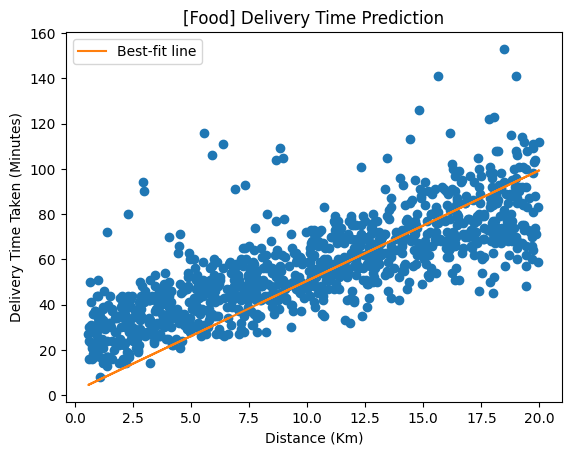

In [107]:
main()